### Import Libraries

In [71]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from statsmodels.tsa.deterministic import DeterministicProcess
from pandas import date_range
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset

In [32]:
df = pd.read_csv("dublinbikes_20200101_20200401.csv.xls")
df.sample(5)

,STATION ID,TIME,LAST UPDATED,NAME,BIKE STANDS,AVAILABLE BIKE STANDS,AVAILABLE BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE
910877,96,2020-02-19 17:55:02,2020-02-19 17:53:28,KILMAINHAM LANE,30,21,9,Open,Kilmainham Lane,53.341805,-6.305085
438089,90,2020-02-04 02:55:02,2020-02-04 02:44:52,BENSON STREET,40,40,0,Open,Benson Street,53.344154,-6.233451
919430,11,2020-02-20 10:40:02,2020-02-20 10:37:26,EARLSFORT TERRACE,30,8,22,Open,Earlsfort Terrace,53.334019,-6.258371
2163385,112,2020-03-30 16:15:02,2020-03-30 16:11:27,NORTH CIRCULAR ROAD (O'CONNELL'S),30,13,17,Open,North Circular Road (O'Connell's),53.357841,-6.251557
663756,110,2020-02-11 16:30:02,2020-02-11 16:26:51,PHIBSBOROUGH ROAD,40,38,1,Open,Phibsborough Road,53.356308,-6.273717


### Select Relevant Columns

In [33]:
df = df[["TIME", "AVAILABLE BIKES"]]
df.head()

,TIME,AVAILABLE BIKES
0,2020-01-01 06:25:02,2
1,2020-01-01 06:30:02,2
2,2020-01-01 06:35:02,2
3,2020-01-01 06:40:03,0
4,2020-01-01 06:45:02,0


### Convert to datetime format

In [34]:
df["TIME"] = pd.to_datetime(df["TIME"])
df.tail()

,TIME,AVAILABLE BIKES
2228273,2020-04-01 23:35:02,3
2228274,2020-04-01 23:40:02,3
2228275,2020-04-01 23:45:02,3
2228276,2020-04-01 23:50:03,3
2228277,2020-04-01 23:55:02,3


### Set TIME as Index

In [35]:
df = df.set_index("TIME")
df.head()

,AVAILABLE BIKES
TIME,
2020-01-01 06:25:02,2
2020-01-01 06:30:02,2
2020-01-01 06:35:02,2
2020-01-01 06:40:03,0
2020-01-01 06:45:02,0


### Dataframe Ending Values

In [37]:
df.tail()

,AVAILABLE BIKES
TIME,
2020-04-01 23:35:02,3
2020-04-01 23:40:02,3
2020-04-01 23:45:02,3
2020-04-01 23:50:03,3
2020-04-01 23:55:02,3


### Prepare Data to do Forecasting for next 10 Minutes

In [91]:
dp = DeterministicProcess(df.index, order=3)
X = dp.in_sample()
X_fore = dp.out_of_sample(steps=2)
X_fore.index = pd.date_range(start = "2020-04-02 00:00:02", freq = "5min", periods = 2)

### Forecasting of Available Bikes after 10 minutes using Ridge Regression

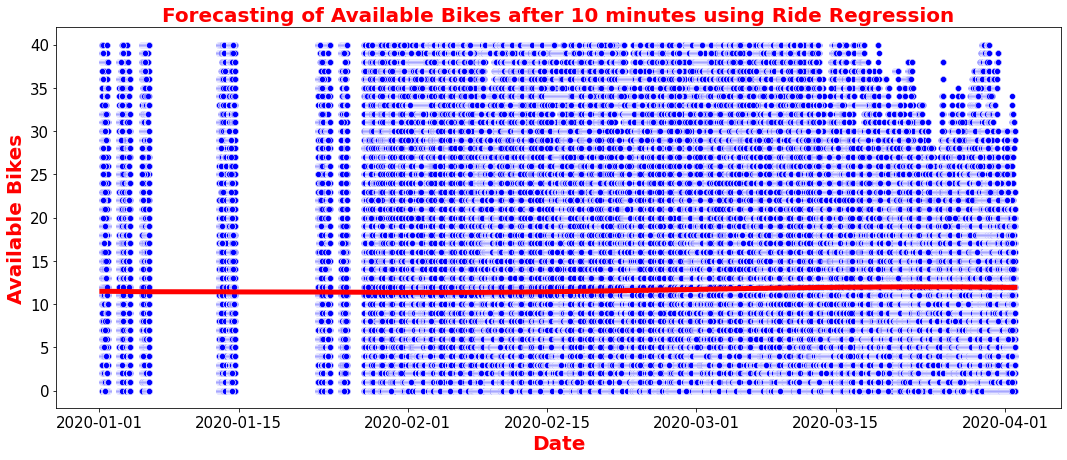

In [92]:
y = df["AVAILABLE BIKES"]
ridge = Ridge(alpha = 1)

ridge.fit(X, y)

pred = ridge.predict(X)
for_predict = ridge.predict(X_fore)

plt.figure(figsize = (18, 7))
sns.scatterplot(x = df.index, y = "AVAILABLE BIKES", data = df, color = "blue")
sns.lineplot(x = df.index, y = pred, color = "red", linewidth = 5)
sns.lineplot(x = X_fore.index, y = for_predict, color = "black", linewidth = 20)
plt.title("Forecasting of Available Bikes after 10 minutes using Ride Regression", size = 20, color = "red", weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Date", size = 20, color = "red", weight = "bold")
plt.ylabel("Available Bikes", size = 20, color = "red", weight = "bold")
plt.show()

In [93]:
print("Forecasting of Available Bikes after 10 minutes using Random Forest Regression =", for_predict[-1])

Forecasting of Available Bikes after 10 minutes using Random Forest Regression = 11.915595146393779


### Forecasting of Available Bikes after 10 minutes using Random Forest Regression

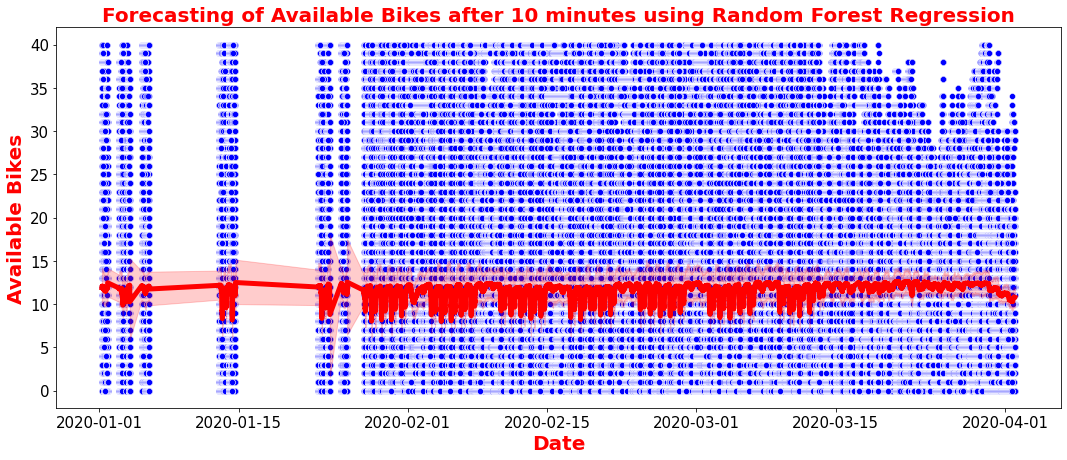

In [74]:
y = df["AVAILABLE BIKES"]
rf = RandomForestRegressor()

rf.fit(X, y)

pred = rf.predict(X)
for_predict = rf.predict(X_fore)

plt.figure(figsize = (18, 7))
sns.scatterplot(x = df.index, y = "AVAILABLE BIKES", data = df, color = "blue")
sns.lineplot(x = df.index, y = pred, color = "red", linewidth = 5)
sns.lineplot(x = X_fore.index, y = for_predict, color = "black", linewidth = 20)
plt.title("Forecasting of Available Bikes after 10 minutes using Random Forest Regression", size = 20, color = "red", weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Date", size = 20, color = "red", weight = "bold")
plt.ylabel("Available Bikes", size = 20, color = "red", weight = "bold")
plt.show()

In [77]:
print("Forecasting of Available Bikes after 10 minutes using Random Forest Regression =", for_predict[-1])

Forecasting of Available Bikes after 10 minutes using Random Forest Regression = 3.0


### Prepare Data to do Forecasting for next 30 Minutes

In [78]:
dp = DeterministicProcess(df.index, order=3)
X = dp.in_sample()
X_fore = dp.out_of_sample(steps=6)
X_fore.index = pd.date_range(start = "2020-04-02 00:00:02", freq = "5min", periods = 6)

### Forecasting of Available Bikes after 30 minutes using Ridge Regression

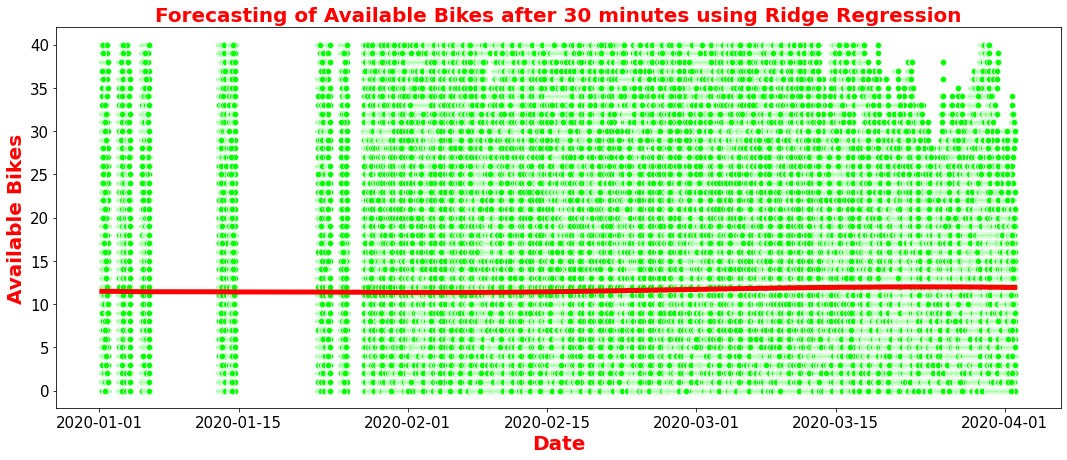

In [80]:
y = df["AVAILABLE BIKES"]
ridge = Ridge()

ridge.fit(X, y)

pred = ridge.predict(X)
for_predict = ridge.predict(X_fore)

plt.figure(figsize = (18, 7))
sns.scatterplot(x = df.index, y = "AVAILABLE BIKES", data = df, color = "lime")
sns.lineplot(x = df.index, y = pred, color = "red", linewidth = 5)
sns.lineplot(x = X_fore.index, y = for_predict, color = "black", linewidth = 20)
plt.title("Forecasting of Available Bikes after 30 minutes using Ridge Regression", size = 20, color = "red", weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Date", size = 20, color = "red", weight = "bold")
plt.ylabel("Available Bikes", size = 20, color = "red", weight = "bold")
plt.show()

In [81]:
print("Forecasting of Available Bikes after 30 minutes using Ridge Regression =", for_predict[-1])

Forecasting of Available Bikes after 30 minutes using Ridge Regression = 11.915593020501298


### Forecasting of Available Bikes after 30 minutes using Random Forest Regression

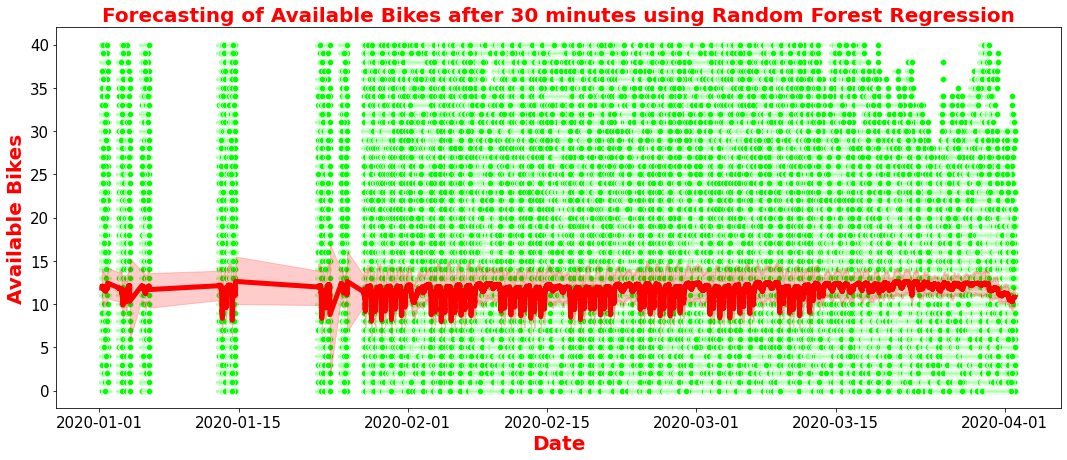

In [82]:
y = df["AVAILABLE BIKES"]
rf = RandomForestRegressor()

rf.fit(X, y)

pred = rf.predict(X)
for_predict = rf.predict(X_fore)

plt.figure(figsize = (18, 7))
sns.scatterplot(x = df.index, y = "AVAILABLE BIKES", data = df, color = "lime")
sns.lineplot(x = df.index, y = pred, color = "red", linewidth = 5)
sns.lineplot(x = X_fore.index, y = for_predict, color = "black", linewidth = 20)
plt.title("Forecasting of Available Bikes after 30 minutes using Random Forest Regression", size = 20, color = "red", weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Date", size = 20, color = "red", weight = "bold")
plt.ylabel("Available Bikes", size = 20, color = "red", weight = "bold")
plt.show()

In [85]:
print("Forecasting of Available Bikes after 30 minutes using Rabdom Forest Regression =", for_predict[-1])

Forecasting of Available Bikes after 30 minutes using Rabdom Forest Regression = 3.0


### Prepare Data to do Forecasting for next 1 hour

In [86]:
dp = DeterministicProcess(df.index, order=3)
X = dp.in_sample()
X_fore = dp.out_of_sample(steps=12)
X_fore.index = pd.date_range(start = "2020-04-02 00:00:02", freq = "5min", periods = 12)

### Forecasting of Available Bikes after 1 hour using Ridge Regression

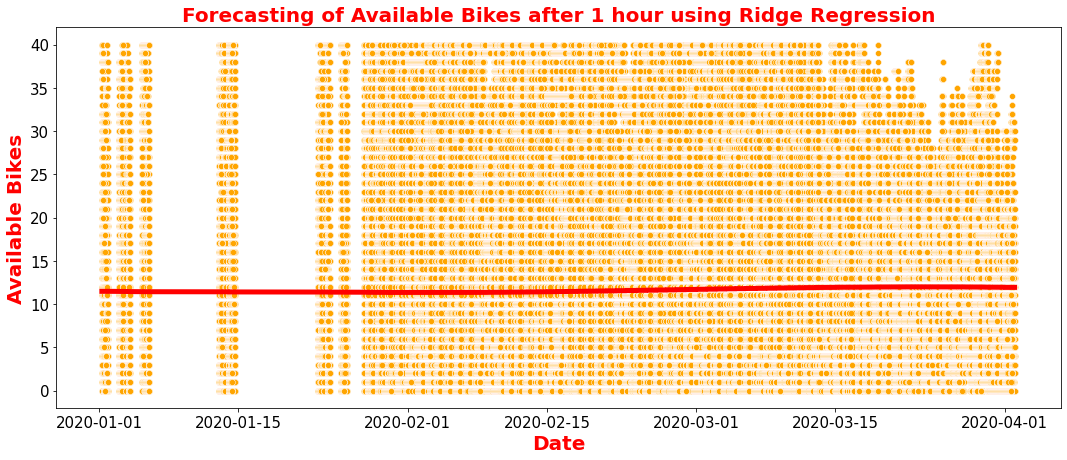

In [87]:
y = df["AVAILABLE BIKES"]
ridge = Ridge()

ridge.fit(X, y)

pred = ridge.predict(X)
for_predict = ridge.predict(X_fore)

plt.figure(figsize = (18, 7))
sns.scatterplot(x = df.index, y = "AVAILABLE BIKES", data = df, color = "orange")
sns.lineplot(x = df.index, y = pred, color = "red", linewidth = 5)
sns.lineplot(x = X_fore.index, y = for_predict, color = "black", linewidth = 20)
plt.title("Forecasting of Available Bikes after 1 hour using Ridge Regression", size = 20, color = "red", weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Date", size = 20, color = "red", weight = "bold")
plt.ylabel("Available Bikes", size = 20, color = "red", weight = "bold")
plt.show()

In [88]:
print("Forecasting of Available Bikes after 1 hour using Ridge Regression =", for_predict[-1])

Forecasting of Available Bikes after 1 hour using Ridge Regression = 11.91558983159623


### Forecasting of Available Bikes after 1 hour using Random Forest Regression

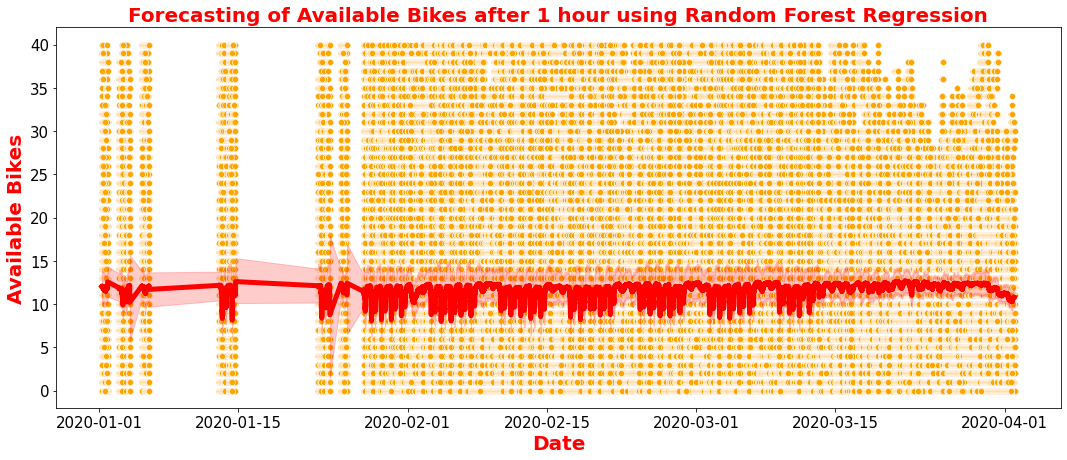

In [89]:
y = df["AVAILABLE BIKES"]
rf = RandomForestRegressor()

rf.fit(X, y)

pred = rf.predict(X)
for_predict = rf.predict(X_fore)

plt.figure(figsize = (18, 7))
sns.scatterplot(x = df.index, y = "AVAILABLE BIKES", data = df, color = "orange")
sns.lineplot(x = df.index, y = pred, color = "red", linewidth = 5)
sns.lineplot(x = X_fore.index, y = for_predict, color = "black", linewidth = 20)
plt.title("Forecasting of Available Bikes after 1 hour using Random Forest Regression", size = 20, color = "red", weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Date", size = 20, color = "red", weight = "bold")
plt.ylabel("Available Bikes", size = 20, color = "red", weight = "bold")
plt.show()

In [90]:
print("Forecasting of Available Bikes after 1 hour using Random Forest Regression =", for_predict[-1])

Forecasting of Available Bikes after 1 hour using Random Forest Regression = 3.0
